# Mini-Project 4

In [1]:
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import lineStyles

In [14]:
symbol = 'AAPL'
ticker = yf.Ticker(symbol)
expiry_dates = ticker.options

In [46]:
def BS_price_simulate(S0, mu, r, sigma, T, steps):
    dt = T/steps
    z = np.random.normal(0, 1, steps)
    incre = (mu + r - 0.5 * sigma**2)*dt + sigma * np.sqrt(dt) * z
    log_return = np.cumsum(incre)
    path = S0 * np.exp(log_return)
    return path

## Historical Volatility of Real Market vs Historical Volatility of the Simulated Price

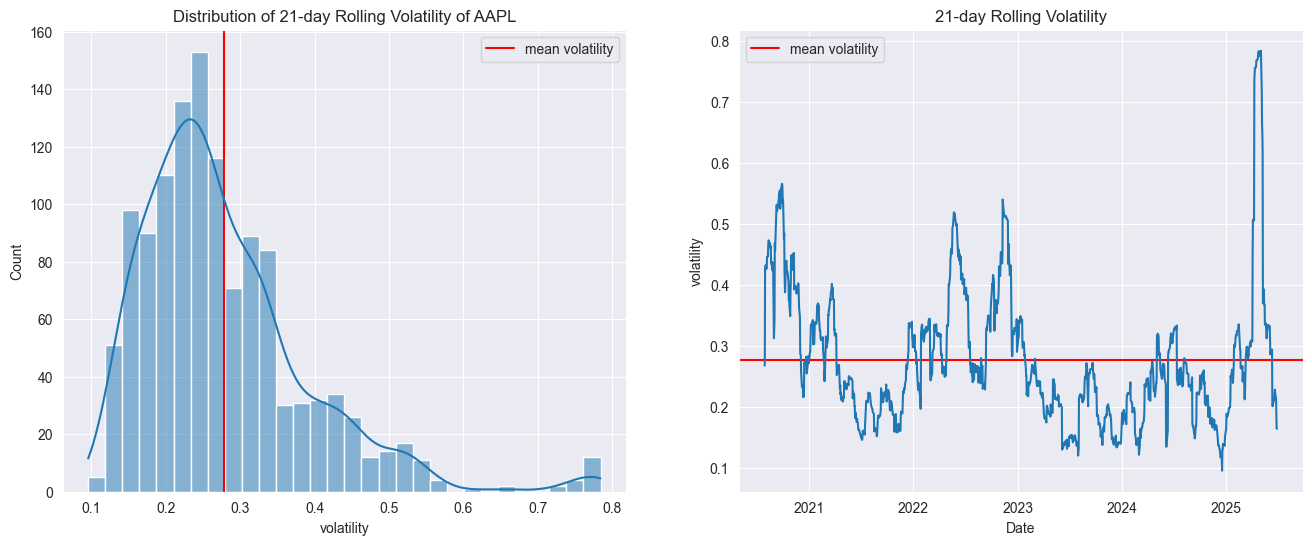

The mean of the 21-day rolling volatility of AAPL is: 0.2777


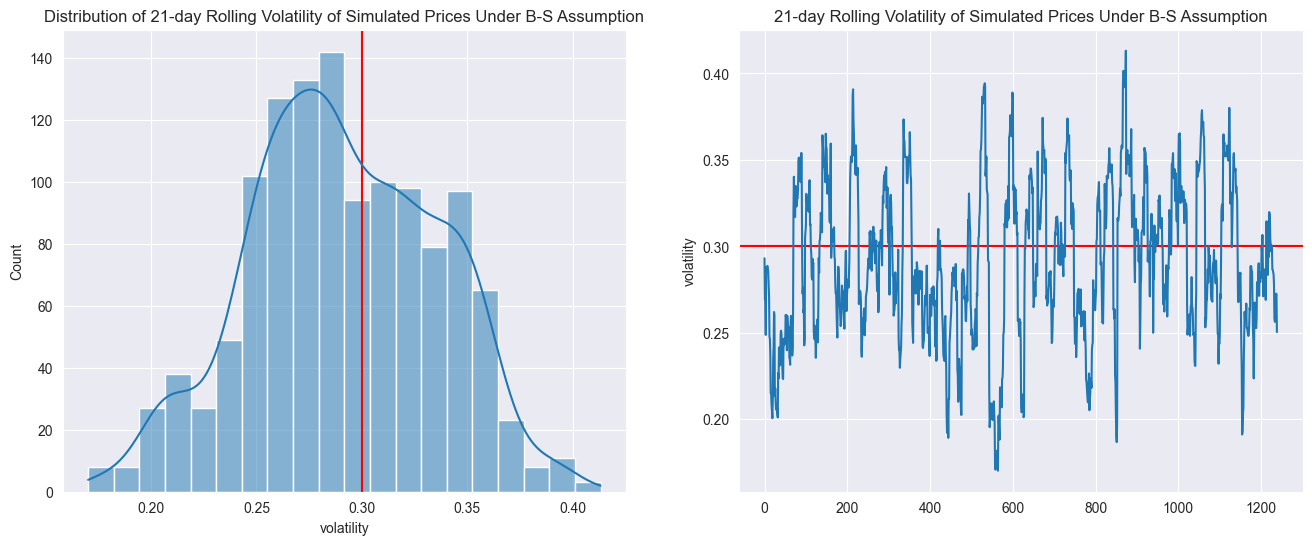

In [67]:
rolling_window = 21

market_data = ticker.history(period='5y')
log_return = np.log(market_data['Close']/market_data['Close'].shift(1)).dropna()
volatility_rolling = log_return.rolling(rolling_window).std().dropna()*np.sqrt(252)
mean = volatility_rolling.mean()

_, axes = plt.subplots(1, 2, figsize=(16, 6))
axes[0].set_title(f'Distribution of {rolling_window}-day Rolling Volatility of {symbol}')
axes[0].set_xlabel('volatility')
axes[0].axvline(mean, color='r', label='mean volatility')
axes[0].legend()
sns.histplot(volatility_rolling, kde=True, ax=axes[0])

axes[1].set_title(f'{rolling_window}-day Rolling Volatility')
axes[1].set_ylabel('volatility')
axes[1].axhline(mean, color='r', label='mean volatility')
sns.lineplot(x=volatility_rolling.index, y=volatility_rolling, ax=axes[1])
plt.show()
print(f"The mean of the {rolling_window}-day rolling volatility of {symbol} is: {volatility_rolling.mean():.4f}")

###################################################################################################

_, axes = plt.subplots(1, 2, figsize=(16, 6))
simulated_price = BS_price_simulate(100, 0.05, 0.05, 0.3, 5, 252*5)
log_return = np.log(simulated_price[1:]/simulated_price[:-1])
rolling_windows = np.lib.stride_tricks.sliding_window_view(log_return, rolling_window)
volatility_rolling = np.std(rolling_windows, axis=-1)*np.sqrt(252)
axes[0].set_title(f'Distribution of {rolling_window}-day Rolling Volatility of Simulated Prices Under B-S Assumption')
axes[0].set_xlabel('volatility')
axes[0].axvline(0.3, color='r', label='sigma')
sns.histplot(volatility_rolling, kde=True, ax=axes[0])

axes[1].set_title(f'{rolling_window}-day Rolling Volatility of Simulated Prices Under B-S Assumption')
axes[1].set_ylabel('volatility')
axes[1].axhline(0.3, color='r', label='sigma')
axes[1].plot(volatility_rolling)
plt.show()

## TODO
Write explanation above, and discuss the assumption of the BS model

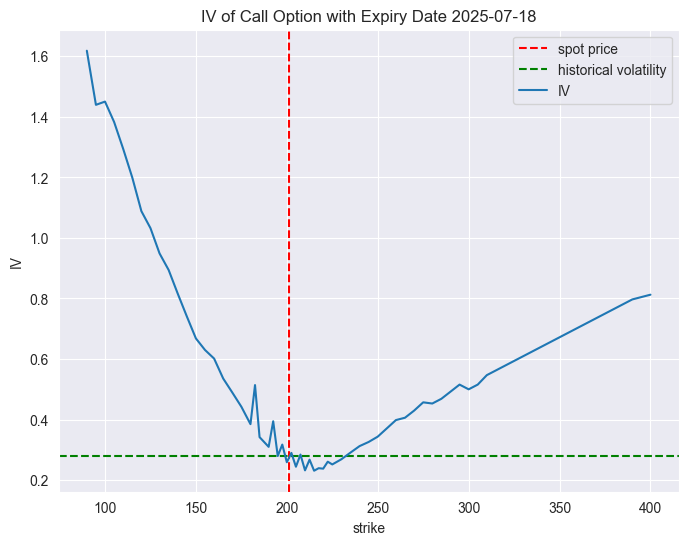

In [34]:
expiry = expiry_dates[3]
option = ticker.option_chain(expiry)
spot = market_data['Close'].iloc[-1]

plt.figure(figsize=(8, 6))
plt.ylabel('IV')
plt.title(f"IV of Call Option with Expiry Date {expiry}")
plt.axvline(spot, color='r', linestyle='--', label='spot price')
plt.axhline(mean, color='g', linestyle='--', label='historical volatility')
sns.lineplot(data=option.calls, x='strike', y='impliedVolatility', label='IV')
plt.show()

## TODO
Write an explanation for the smile shape using the fat tail distribution explanation, and also discuss the BS model

In [54]:
contract = yf.Ticker('AAPL250627C00180000')
contract.history(period='max')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-12 00:00:00-04:00,22.450001,32.099998,22.450001,31.990000,19,0.0,0.0
2025-05-19 00:00:00-04:00,29.500000,30.480000,29.500000,30.480000,4,0.0,0.0
2025-05-21 00:00:00-04:00,26.469999,26.469999,24.350000,24.350000,6,0.0,0.0
2025-05-22 00:00:00-04:00,24.370001,24.370001,24.370001,24.370001,1,0.0,0.0
2025-05-23 00:00:00-04:00,20.700001,20.700001,18.950001,18.950001,74,0.0,0.0
2025-05-27 00:00:00-04:00,21.000000,22.850000,20.900000,22.770000,26,0.0,0.0
2025-05-28 00:00:00-04:00,22.700001,23.500000,22.700001,23.450001,15,0.0,0.0
2025-05-29 00:00:00-04:00,25.170000,25.170000,21.770000,21.930000,22,0.0,0.0
2025-05-30 00:00:00-04:00,19.879999,21.809999,19.309999,21.809999,212,0.0,0.0


TODO
1. Analyzing the distribution of historical volatility (21d) or (15m) or other frequency, and compare them
2. Analyze the historical volatility vs implied volatility
3. Some Volatility model, and delta hedging simulation on real market data

In [ ]:
## Historical Volatility across Different Window
symbol = 'SPY'
ticker = yf.Ticker(symbol)
expiry_dates = ticker.options